위상 플립을 적용하면'01' 또는 '10'을 발생시키지 못함

특정 큐비트에 노이즈 인가하는 실습

In [1]:
# general imports
import matplotlib.pyplot as plt
%matplotlib inline

import boto3
from braket.aws import AwsDevice
from braket.circuits import Circuit, Noise
from braket.devices import LocalSimulator

In [2]:
# 노이즈 시뮬레이터 디바이스 선택
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/dm1")

we add a noise channel right after each gate

1.	첫 번째 큐비트를 중첩 상태로 만듭니다.

2.	비트 플립 노이즈를 적용합니다.

3.	두 큐비트를 얽힘 상태로 만듭니다.

4.	위상 플립 노이즈를 적용합니다


In [6]:
# 간단한 양자 회로 생성
#phaseFlip": {"probability": 0.1}: 큐비트의 위상이 180도 회전할 확률을 10%로 설정
# 특정 게이트 생성 후 0번째 큐비트에 비트 플립 노이즈 추가 
circuit = Circuit().h(0).bit_flip(0,0.1).cnot(0,1).bit_flip(0,0.1)

In [7]:
print(circuit)

T  : │        0        │        1        │
      ┌───┐ ┌─────────┐       ┌─────────┐ 
q0 : ─┤ H ├─┤ BF(0.1) ├───●───┤ BF(0.1) ├─
      └───┘ └─────────┘   │   └─────────┘ 
                        ┌─┴─┐             
q1 : ───────────────────┤ X ├─────────────
                        └───┘             
T  : │        0        │        1        │


In [8]:
result = device.run(circuit, shots=1000).result()
counts = result.measurement_counts
# print counts
print(counts)

Counter({'11': 463, '00': 446, '01': 48, '10': 43})


In [9]:
# 결과 출력
#print(result.measurement_counts)

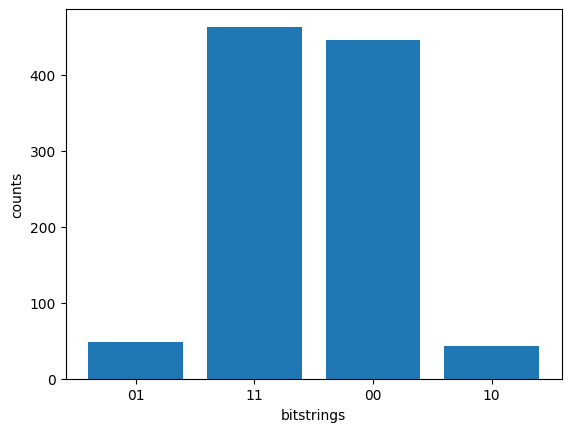

In [10]:
# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');